<a href="https://colab.research.google.com/github/jpbarragan99/BioInf_Project1/blob/main/PDDpt2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 2, Exploratory Data Analysis**

## **Installing conda and rdkit, loading the bioactivity data and importing libraries**

In [4]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! pip install seaborn

--2022-10-04 17:46:55--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  90.8MB/s    in 0.9s    

2022-10-04 17:46:56 (90.8 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / 

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## **Calculate Lipinski descriptors**

Christoper Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating *druglikeness* of compounds. Such druglikeness is based on the absorption, distribution, metabolism and excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analysed all orally active FDA- approved drugs in the formulation of what is to be known as the *Rule of Five* or **Lipinski's Rule**.

Lipinski's Rule stated the following:


*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydorgen bond acceptors < 10



### **Calculate descriptors**

In [8]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski (smiles, verbose = False):
  moldata = []
  for i in smiles:
    mol = Chem.MolFromSmiles(i)
    moldata.append(mol)

  baseData = np.arange (1,1)
  i = 0

  for mol in moldata:
    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors = Lipinski.NumHDonors(mol)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

    row = np.array ([
        desc_MolWt,
        desc_MolLogP,
        desc_NumHDonors,
        desc_NumHAcceptors
    ])

    if (i==0):
      baseData=row
    else:
      baseData=np.vstack([baseData,row])
    
    i = i + 1

  columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
  descriptors = pd.DataFrame(data = baseData, columns = columnNames)

  return descriptors

In [9]:
df_lipinski = lipinski(df.canonical_smiles)

## **Combine DataFrames**

Now, let's take a look at the 2 DataFrames that will be combined, and then combine them.

In [10]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1173,425.532,5.35660,3.0,3.0
1174,323.400,2.28740,4.0,3.0
1175,323.396,3.15730,3.0,3.0
1176,389.455,4.41730,3.0,4.0


In [11]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0
...,...,...,...,...
1173,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,intermediate,6500.0
1174,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,inactive,10300.0
1175,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,intermediate,1600.0
1176,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,intermediate,3100.0


In [12]:
df_combined = pd.concat([df,df_lipinski], axis = 1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1173,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,intermediate,6500.0,425.532,5.35660,3.0,3.0
1174,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,inactive,10300.0,323.400,2.28740,4.0,3.0
1175,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,intermediate,1600.0,323.396,3.15730,3.0,3.0
1176,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,intermediate,3100.0,389.455,4.41730,3.0,4.0


## **Convert IC50 to pIC50**

To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
* Take the molar value and apply -log10
* Delete the standard_value column and create a new pIC50 column

In [14]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

It is important to note that values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [15]:
df_combined.standard_value.describe()

count      1178.000000
mean      47690.704584
std       33704.746524
min         210.000000
25%       21472.500000
50%       41295.000000
75%       70707.500000
max      432000.000000
Name: standard_value, dtype: float64

In [16]:
-np.log10((10**-9)* 100000000)

1.0

In [17]:
-np.log10((10**-9)* 10000000000)

-1.0

In [18]:
def norm_value(input):
  norm = []

  for i in input ['standard_value']:
    if i > 100000000:
      i = 100000000
    norm.append(i)

  input ['standard_value_norm'] = norm
  x = input.drop ('standard_value', 1)

  return x

First we will apply the norm_value() function so that the values in the standard_value column is normalized

In [19]:
df_norm = norm_value (df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
1173,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,intermediate,425.532,5.35660,3.0,3.0,6500.0
1174,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,inactive,323.400,2.28740,4.0,3.0,10300.0
1175,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,intermediate,323.396,3.15730,3.0,3.0,1600.0
1176,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,intermediate,389.455,4.41730,3.0,4.0,3100.0


In [20]:
df_norm.standard_value_norm.describe()

count      1178.000000
mean      47690.704584
std       33704.746524
min         210.000000
25%       21472.500000
50%       41295.000000
75%       70707.500000
max      432000.000000
Name: standard_value_norm, dtype: float64

In [21]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1173,CHEMBL4867842,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(Oc4ccccc4)cc3)c...,intermediate,425.532,5.35660,3.0,3.0,5.187087
1174,CHEMBL4871785,O=C(NCC1CCNCC1)c1cc2ccc(-c3cn[nH]c3)cc2[nH]1,inactive,323.400,2.28740,4.0,3.0,4.987163
1175,CHEMBL4862793,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccoc3)cc2[nH]1,intermediate,323.396,3.15730,3.0,3.0,5.795880
1176,CHEMBL4865004,O=C(NCC1CCNCC1)c1c[nH]c2cc(-c3ccoc3)c(-c3ccoc3...,intermediate,389.455,4.41730,3.0,4.0,5.508638


In [22]:
df_final.pIC50.describe()

count    1178.000000
mean        4.486051
std         0.467428
min         3.364516
25%         4.150535
50%         4.384103
75%         4.668117
max         6.677781
Name: pIC50, dtype: float64

## **Removing the "intermediate" bioactivity class**

We'll remove the *intermediate* class from our data set

In [23]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1169,CHEMBL4868018,O=C(NCC1CCNCC1)c1cc2cc(-c3ccc(N4CCCCC4)cc3)ccc...,inactive,416.569,4.55460,3.0,3.0,4.395774
1170,CHEMBL4855636,Cc1cc(C#N)ccc1-c1ccc2[nH]c(C(=O)NCC3CCNCC3)cc2c1,inactive,372.472,3.74440,3.0,3.0,4.301030
1171,CHEMBL4869765,COc1ccc(-c2ccc3cc(C(=O)NCC4CCNCC4)[nH]c3c2)cc1,inactive,363.461,3.57290,3.0,3.0,4.974694
1172,CHEMBL4864012,O=C(NCC1CCNCC1)c1cc2ccc(-c3ccc(OC(F)(F)F)cc3)c...,inactive,417.431,4.46290,3.0,3.0,4.970616


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [24]:
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

### **Frecuency plot of the 2 bioactivity clases**

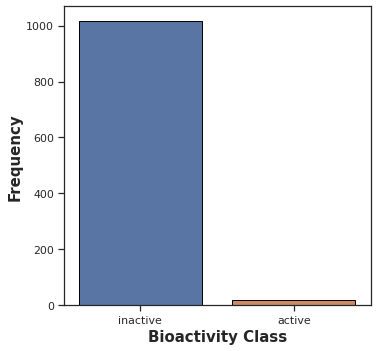

In [27]:
plt.figure(figsize = (5.5, 5.5))

sns.countplot(x = 'bioactivity_class', data = df_2class, edgecolor = 'black')

plt.xlabel('Bioactivity Class', fontsize = 15, fontweight= 'bold')
plt.ylabel('Frequency', fontsize = 15, fontweight = 'bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

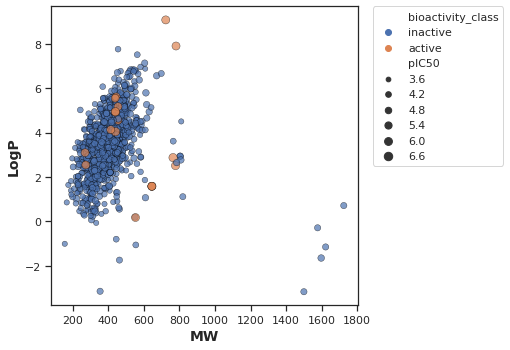

In [29]:
plt.figure (figsize = (5.5, 5.5)) 

sns.scatterplot (x = 'MW', y = 'LogP', data = df_2class, hue = 'bioactivity_class', size = 'pIC50', edgecolor = 'black', alpha = 0.7)

plt.xlabel ('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel ('LogP', fontsize = 14, fontweight = 'bold')
plt.legend (bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)
plt.savefig ('plot_MW_vs_LogP.pdf')

### **Box Plots**

#### **pIC50**

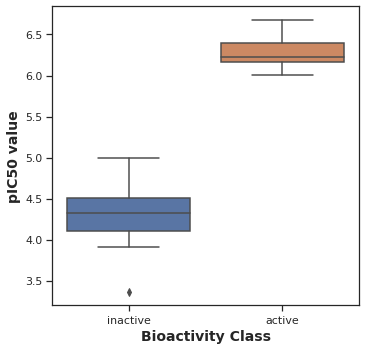

In [30]:
plt.figure (figsize = (5.5, 5.5))

sns.boxplot (x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel ('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel ('pIC50 value', fontsize = 14, fontweight = 'bold')

plt.savefig ('plot_ic50.pdf')

**Statisctical analysis | Mann-Whitney U Test**

In [31]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [32]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,18324.0,2.964159e-13,0.05,Different distribution (reject H0)


####**MW**

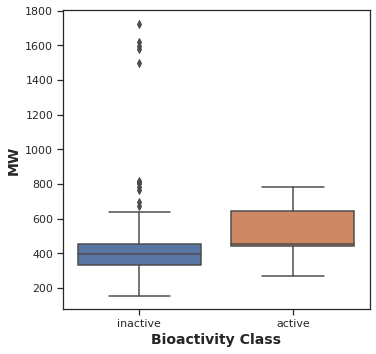

In [34]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot (x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel ('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel ('MW', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_MW.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [35]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,13713.0,0.000299,0.05,Different distribution (reject H0)


#### **LogP**

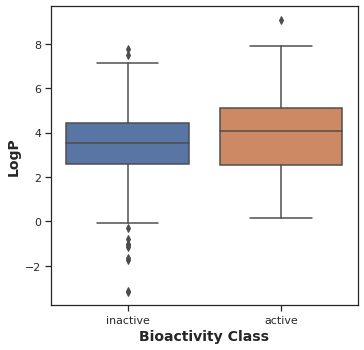

In [36]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot (x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel ('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel ('LogP', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,10153.0,0.431207,0.05,Same distribution (fail to reject H0)


####**NumHDonors**

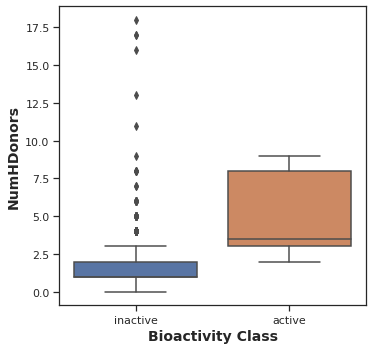

In [38]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot (x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel ('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel ('NumHDonors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [39]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,15920.0,2.688165e-08,0.05,Different distribution (reject H0)


####**NumHAcceptors**

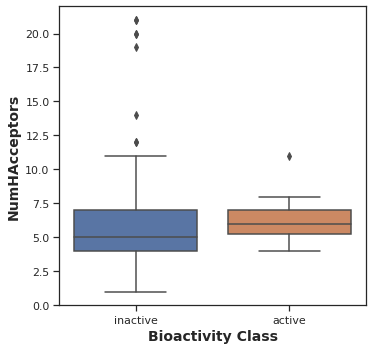

In [40]:
plt.figure(figsize = (5.5, 5.5))

sns.boxplot (x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel ('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel ('NumHAcceptors', fontsize = 14, fontweight = 'bold')

plt.savefig('plot_NumHAcceptors.pdf')

Statistical analysis | Mann-Whitney U Test


In [41]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,11934.0,0.025457,0.05,Different distribution (reject H0)


#### **Interpetration of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip Files**

In [42]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: bioactivity_preprocessed_data.csv (deflated 77%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
